# General Data Overview

For the purpose of this project we will use a customer churn prediction dataset *internet_service_churn.csv*. Customer churn is the percentage of customers who stopped using a company's product or service during a specified time period. This is a vital metric because retaining existing customers is more cost-effective than acquiring new ones. Churn can occur due to various reasons, including unsatisfactory service, competing products, changing customer needs, and a lack of engagement. 

**The main goal of this project** is to help companies with investigating and analysing the existing data (through EDA) and creating effective predictive model(s) for further implementation targeted strategies to retain customers, enhance consumer satisfaction, and maintain sustainable growth.

The provided dataset belongs to an unknown internet service provider and contains information from over 70,000 unique customers, including their internet usage, subscription age, number of service failures and additional services used.

The dataset contains information about subscribers and their likelihood of churning based on various factors.

**Meaning of the Columns names:**

- `id`: Unique identifier for each customer.

- `is_tv_subscriber`: Indicates if the customer has a TV subscription (1 = Yes, 0 = No).

- `is_movie_package_subscriber`: Indicates if the customer has a movie package subscription (1 = Yes, 0 = No).

- `subscription_age`: The age of the subscription in years.

- `bill_avg`: Average monthly bill amount.

- `remaining_contract`: Remaining contract duration in years.

- `service_failure_count`: Number of service failures reported by the customer.

- `download_avg`: Average download speed.

- `upload_avg`: Average upload speed.

- `download_over_limit`: Indicates if the customer has exceeded their download limit.

- `churn`: Indicates if the customer has churned (1 = Yes, 0 = No).

# Imports

In [1407]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Datasets Load + DataFrames build

In [1408]:
df = pd.read_csv("internet_service_churn.csv")
# df = data.copy()

# Initial structure overview

- **Step 1.** Cheking first 10 rows of the dataset:

In [1409]:
df.head(10)

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,NaN,1,0.0,0.0,0,1
8,94,0,0,8.54,0,NaN,0,0.0,0.0,0,1
9,112,0,0,8.33,0,NaN,0,0.0,0.0,0,1


- **Step 2.** Cheking dataset information:

In [1410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


In [1411]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


- **Step 3.** Cheking the shape of the dataset and the types of values:

In [1412]:
df.shape

(72274, 11)

In [1413]:
df.dtypes

id                               int64
is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
reamining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object

# Data Visualization Methods

In [1414]:
def plot_missing_data_barplot(data):
    plt.figure(figsize=(4, 5))
    missing_counts = data.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    sns.barplot(x=missing_counts.index, y=missing_counts.values, width=0.3, hue=missing_counts.index, palette="hsv")
    plt.title("Missing Data by Column")
    plt.xlabel("Columns")
    plt.ylabel("Missing Values Count")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


def plot_correlation_matrix(data):
    plt.figure(figsize=(10, 8))
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cmap="viridis_r", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()


def plot_target_distribution(data):
    plt.figure(figsize=(4, 5))
    plt.title("Distribution of  'churn'")
    sns.countplot(x="churn", data=data, hue="churn", palette="hsv", width=0.3, legend=False)
    plt.xlabel("Churn")
    plt.ylabel("Number of records")
    plt.xticks([0, 1], ["hasn't churned", "has churned"])
    plt.show()

def plot_subscription_age_distribution(data):
    sns.boxplot(x="churn", y="subscription_age", data=data, color="green")
    plt.xticks([0, 1], ["hasn't churned", "has churned"])
    plt.show() 


def plot_subs_age_distribution_hist(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x="subscription_age", kde=True, hue="churn", palette="Set2")
    plt.title("Subscription Age and Churn Count")
    plt.show()


def plot_service_failure_distribution(data):
    sns.boxplot(x="churn", y="service_failure_count", data=data, color="green")
    plt.xticks([0, 1], ["hasn't churned", "has churned"])
    plt.show() 


def plot_check_outliers(data, columns):
    plt.figure(figsize=(9, 9))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data[column], color="green")
        plt.title(f"Outliers in {column}")
        plt.xlabel(column)
    plt.tight_layout()
    plt.show()


def plot_categorical_churn(data, categorical_columns):
    n_cols = 2
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

    plt.figure(figsize=(12, 5 * n_rows))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.countplot(x=col, hue="churn", data=data, width=0.4, palette="Greens")
        plt.title(f"Churn by {col}", fontsize=20)
        plt.xlabel(col)
        plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


def plot_numerical_churn(data, numerical_columns):
    n_cols = 2
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

    plt.figure(figsize=(12, 5 * n_rows)) 
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(n_rows, n_cols, i) 
        sns.boxplot(x="churn", y=col, data=data, hue="churn", palette="Greens")
        plt.title(f"Churn vs {col}")
        plt.xlabel("Churn")
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Exploratory Data Analysis (EDA)

Within the framework of this project we conduct the detailed Exploratory Data Analysis, which will help with the data understanding, identifying patterns, and preparing the data for further stages of data preprocessing and modeling. 

Firstly it makes sense to check for the missing values and find possible duplicates. Next steps will be to check the data distribution and define the correlations among data if found.

## 1. Checking Data for missing values

This step is crucial for our particular dataset for several reasons:
- **Data Integrity and Accuracy**: Missing values could lead to incomplete data, which may not accurately represent the population or phenomena being analysed. As a result incomplete data could skew results and lead to incorrect conclusions. Not to mention that missing data can introduce bias if the missingness is not random. For example, if customers who churned are more likely to have missing values in certain fields, this could bias the analysis.

- **Impact on Analysis and Modeling**: Many statistical methods and machine learning algorithms cannot handle missing values directly. Ignoring missing values could lead to errors or incorrect results. And for sure the missing values can degrade the performance of predictive models. For instance, if a significant portion of the `bill_avg` column is missing, any model relying on this feature will be less accurate.
 
- And the last but not the least - **Understanding the Data**: Identifying missing values helps in understanding the patterns and reasons behind the missing data. This can provide insights into the data collection process or customer behavior. Moreover, missing values can indicate data quality issues, such as errors in data entry or collection. Addressing these issues improves the overall quality of the dataset.

- **Step 1.** Checking the whole dataset for missing values:

In [1415]:
df.isnull().sum()

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64

It is clear that our dataset contains missing values in several columns, including bill_avg, remaining_contract, download_avg, and upload_avg. The reasons can vary from technical issues during data capture to customers not providing certain information. 

Let's visualize the amount of missing data in order to estimate the scope of the problem.

- **Step 2.** Visualizing the missing data volume with barplot: 

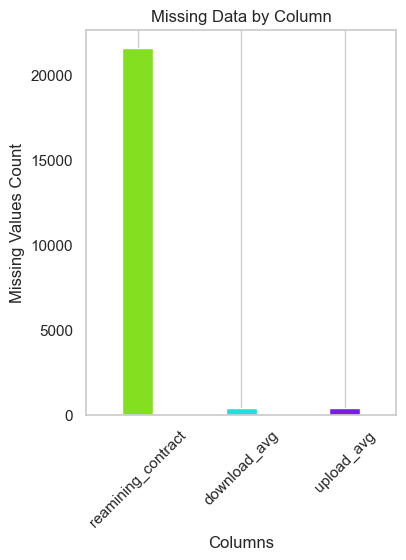

In [1416]:
plot_missing_data_barplot(df)

- **Step 3.** Checking missing values rate:

In [1417]:
for i, n in enumerate(df.isnull().sum()):
    if n!=0:
        print(f"{df.columns[i]} = {round(n/len(df),3)}%")

reamining_contract = 0.298%
download_avg = 0.005%
upload_avg = 0.005%


As it is seen from the calculation results, the `reamining_contract` column has blank values of **21572**, which is nearly 30%. This means that these customers never opted for contract. During the further data preprocessing the blank values could be filled with 0 or deleted depending on the goals.

## 2. Checking Data for possible duplicates

In the context of this telecom churn dataset checking it for duplicates is important because:

- **Data Consistency**: Obviously, duplicates could lead to inconsistent data, which can distort analyses and modeling results. For example, if a customer appears multiple times in the dataset, any analysis based on this data will be skewed. Duplicates could theoretically introduce errors in calculations and statistics. For instance, if a customer's bill average is counted multiple times, the overall average bill will be incorrect.

- **Model Performance**: Duplicates could also introduce bias into our predictive models. If a customer is represented multiple times, the model might overfit to that customer's data, leading to poor generalization. And duplicates increase the size of the dataset without adding new information, which could slow down data processing and modeling.

- **Data Understanding**: Identifying duplicates can help uncover issues in data collection or entry processes. For example, if a customer appears multiple times with different information, it might indicate errors in data recording. Furthermore, understanding why duplicates occur can provide insights into customer behavior or system errors that need to be addressed.

- **Ethical and Practical Considerations**: Ensuring that each customer is represented only once is important for fair analysis and modeling. Duplicates can unfairly influence results, especially in churn prediction where the goal is to identify and retain at-risk customers. In some industries, ensuring data integrity and accuracy is a regulatory requirement, especially when dealing with customer data.

- **Step 1.** Checking the whole dataset for the duplicates:

In [1418]:
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("\nDuplicate rows:")
    print(df[duplicates])

Number of duplicate rows: 0


We are lucky to have zero duplicates in our dataset. Which means - we can skip the steps of addressing the duplicates issue in Data Preprocessing stage.

## 3. Data Distribution

Data distribution is one of the most demonstrative tools in understanding the Data quality and integrity:

- **Outliers**: data distribution can help in detecting anomalies or errors in the dataset. For example, an unusually high `bill_avg` or `download_avg` might indicate data entry errors or exceptional cases that need to be addressed.

- **Model Performance**: First of all, knowing the distribution of features can guide the creation of new features or the transformation of existing ones. For example, if `bill_avg` is highly skewed, normalizing or standardizing it might improve model performance.

- **Algorithm Selection**: Different machine learning algorithms perform better with different types of data distributions. For example, tree-based models like Random Forest can handle skewed data better than linear models, which assume normality.

- **Customer Behavior**: Understanding the distribution of features like `subscription_age`, `bill_avg`, and `service_failure_count` can help in segmenting customers. This can provide insights into different customer groups and their behavior, which is crucial for targeted marketing and retention strategies.

- **Churn Prediction**: The distribution of churn (`churn` column) can reveal patterns in customer behavior. For example, if churn is highly imbalanced (e.g., many more non-churners than churners), it might require special handling in the modeling phase, such as oversampling or undersampling techniques.

- **Step 1.** Checking for the outliers the columns which are under the quesion:

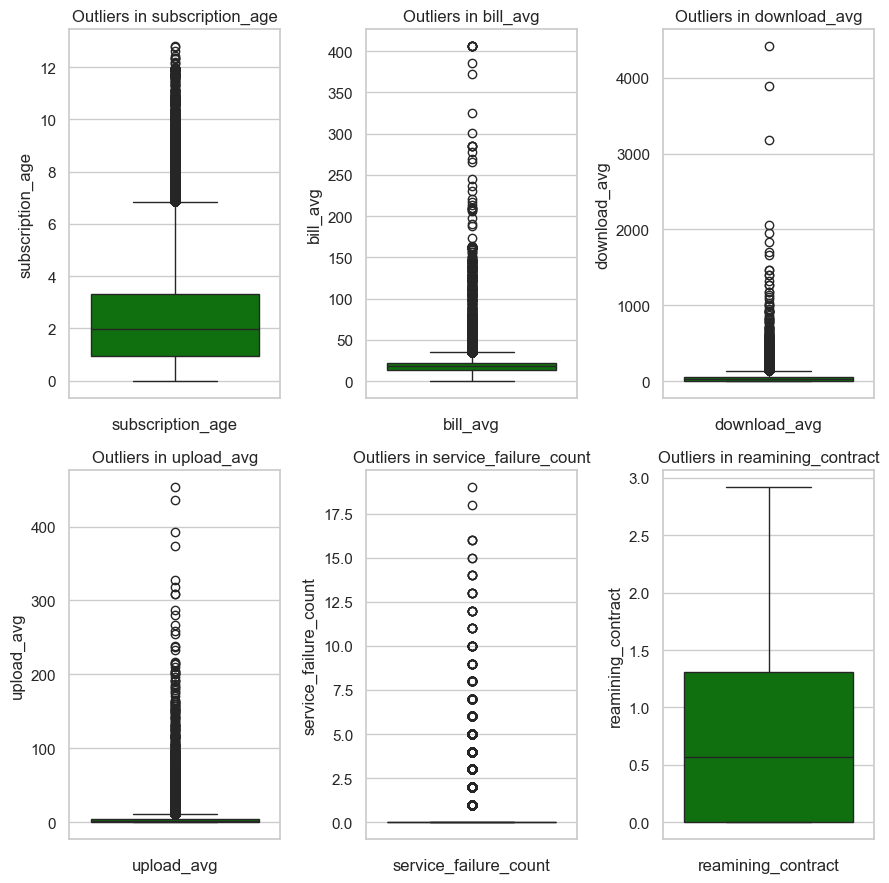

In [1419]:
columns_to_check = ["subscription_age", "bill_avg", "download_avg", "upload_avg", "service_failure_count", "reamining_contract"]

plot_check_outliers(df, columns_to_check)

**Interpretation the boxplots above:** 

Outliers were detected in the `subscription_age`, `bill_avg`, `download_avg`, `upload_avg`, `service_failure_count` columns.

- Outliers in `subscription_age` might indicate customers with unusually long or short subscription durations. These could be special cases (e.g., long-term loyal customers or very new customers) or data entry errors.
- Outliers in `bill_avg` could represent customers with exceptionally high or low average bills. High values might indicate premium services or errors, while low values might indicate promotional offers or data entry issues.
- Outliers in `download_avg` might represent customers with unusually high or low average download speeds. High values could be due to premium plans or technical issues, while low values might indicate poor service or data errors.
- Similar to `download_avg`, outliers in `upload_avg` could indicate customers with exceptionally high or low upload speeds. This might be due to service plans, technical issues, or data entry errors.
- Outliers in `service_failure_count` might represent customers with an unusually high number of service failures. These could be due to technical issues, customer behavior, or data errors. High failure counts might correlate with churn risk.


- **Step 2.** Checking the target variable `Churn` distribution:

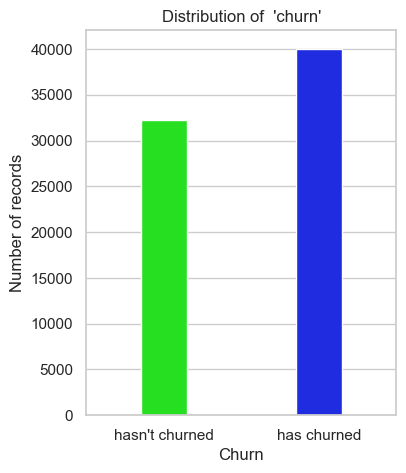

churn
1    40050
0    32224
Name: count, dtype: int64

In [1420]:
plot_target_distribution(df)

df["churn"].value_counts()

While interpreting the histogram of our target valiable distribution, it becames noticeable that the number of people who have already churned is more. There is obvious **imbalance** in the data with *40050* who has churned and *32224* who has not churned. This should be definetely be taken into account on the next Data Preprocessing stage and might require handling such as oversampling or undersampling techniques.

- **Step 3.** Checking the Subscription Age distribution:

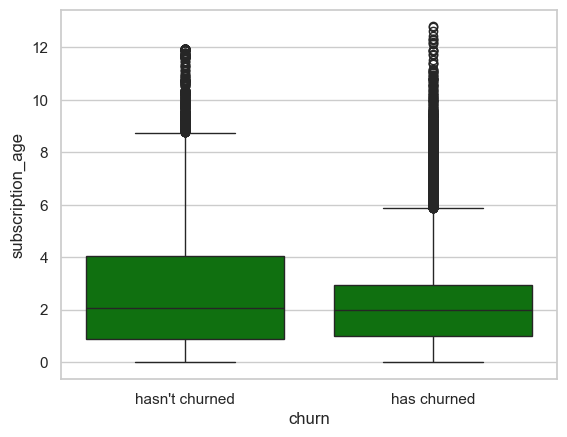

In [1421]:
plot_subscription_age_distribution(df)

From the boxplot above it is clear that the most of the customers who has not churned has subscription age lies between 1 to 4 years. ANd at the same time there are some customers with higher subscription age rates, who has not churned.

As for the customers who has churned, subscription age lies between 1.5 to 3 years. There could be exceptions with customers having high subscription age causing churn. In general, most customers try to leave the service earlier then in 3 years after subscription.

Let's check this via histogram:

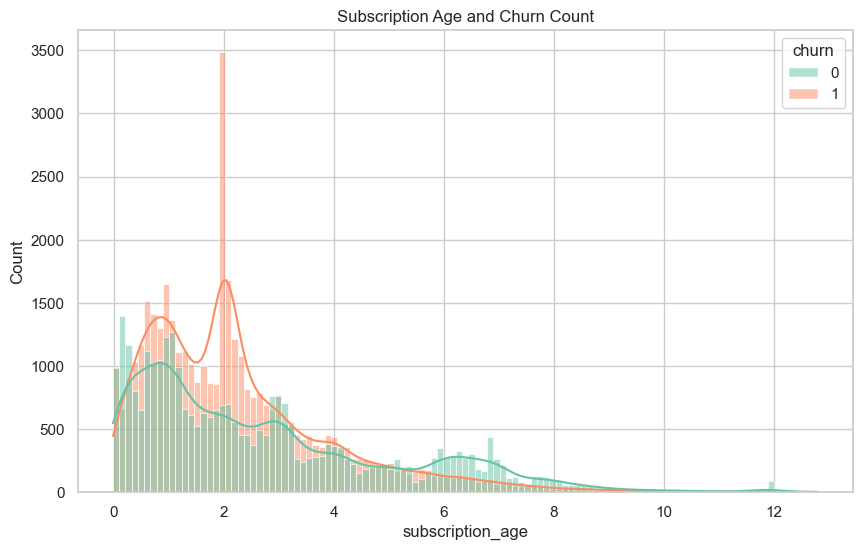

In [1422]:
plot_subs_age_distribution_hist(df)

- **Step 4.** Checking the Service failure distribution:

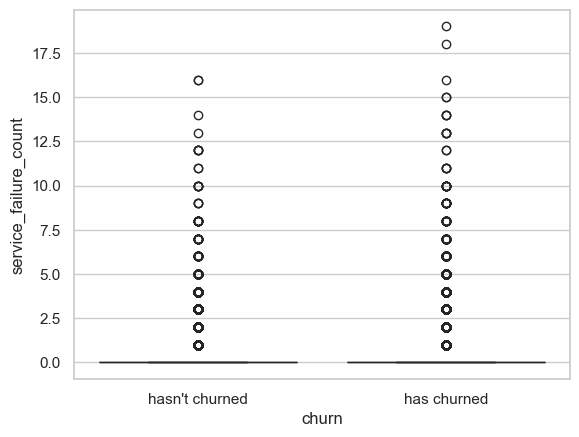

In [1423]:
plot_service_failure_distribution(df)

The boxplot shows thst customers with higher service failure have churned. However, the customers who also have considerably high service failure have not churned. Generally, in case service failure counts rise, it might lead the customer to quit the service.

## 4. Data Correlations

Defining and understanding the correlation in our dataset is important for several reasons:

- **Feature Importance**: Correlation analysis helps in identifying which features are strongly related to the target variable (`churn`). This is crucial for building predictive models, as including highly correlated features can improve model accuracy. This can also reveal redundant features. If two features are highly correlated, including both in the model might lead to multicollinearity, which can affect model stability and interpretability.

- **Understanding Relationships** Correlation analysis can provide insights into customer behavior. For example, if `bill_avg` is strongly correlated with `churn`, it might indicate that customers with higher bills are more likely to churn. And understanding correlations between service-related features (e.g., `service_failure_count`, `download_avg`) and `churn` can help in identifying areas where service improvements might reduce churn.

- **Improving Model Accuracy**: Including features that are strongly correlated with the target variable can improve the performance of predictive models. For example, if `subscription_age` is correlated with `churn`, it can be a valuable feature in our churn prediction model. Correlation analysis helps in selecting the most relevant features for the model, reducing the dimensionality of the dataset and improving computational efficiency.

- **Step 1.** Visualizing the correlation matrix:

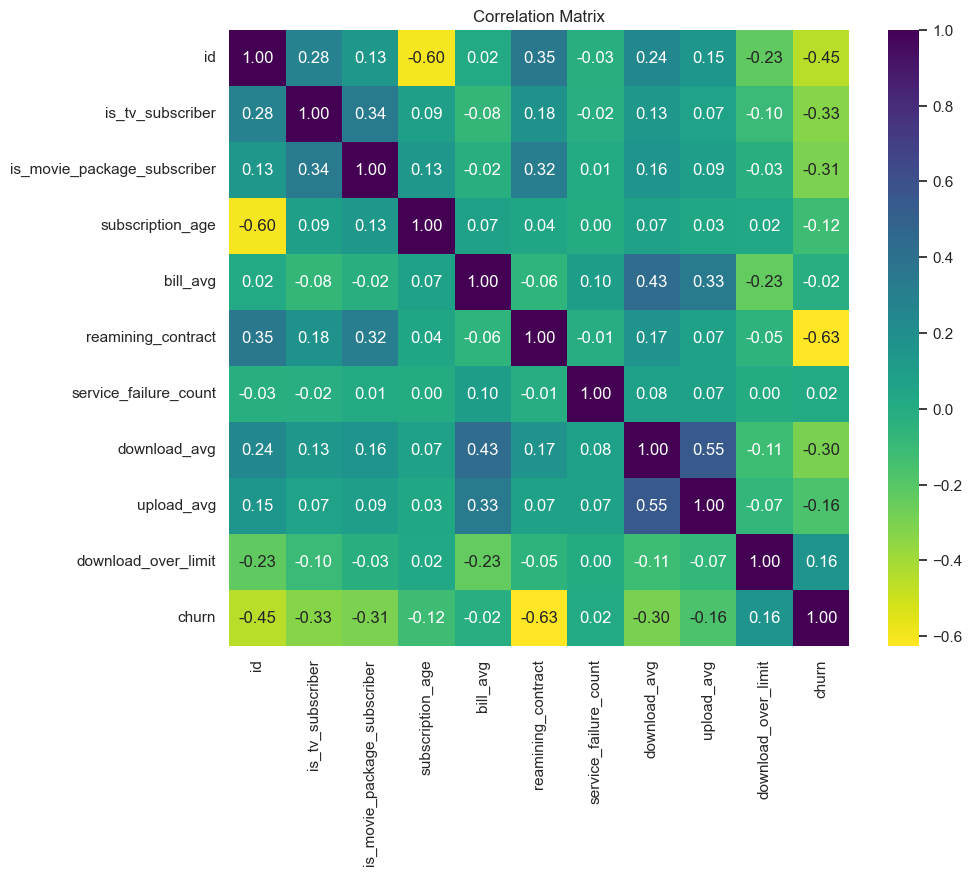

In [1424]:
plot_correlation_matrix(df)

#### Interpretation of the correlation matrix:

- **Strong Negative Correlations**: `reamining_contract` shows strong negative correlation with `churn`, indicating that customers with longer remaining contracts and older subscriptions are less likely to churn.

- **Moderate Positive Correlations**: `download_avg` and `upload_avg` show strong positive correlations with each other, indicating that customers with higher download speeds also tend to have higher upload speeds.

- **Weak Correlations**: Many variables show weak correlations with churn, suggesting that while some features might influence churn, the relationships are not very strong.

## 5. Exploring the nature of features



- **Step 1.** Checking the number of unique values in each column of our dataset:

In [1425]:
df.nunique()

id                             72274
is_tv_subscriber                   2
is_movie_package_subscriber        2
subscription_age                1110
bill_avg                         179
reamining_contract               247
service_failure_count             19
download_avg                    2856
upload_avg                       802
download_over_limit                8
churn                              2
dtype: int64

In [1426]:
df["download_over_limit"].unique()

array([0, 3, 7, 2, 5, 1, 6, 4])

- **Step 2.** Defining Categorical and numerical variables:

#### Categorical variables:

`is_tv_subscriber`has only two unique values, indicating a binary categorical variable (e.g., 0 and 1, representing "No" and "Yes" for TV subscription).

`is_movie_package_subscriber` also has only two unique values, indicating a binary categorical variable (e.g., 0 and 1, representing "No" and "Yes" for movie package subscription).

`churn` column clearly has only two unique values, indicating a binary categorical variable (e.g., 0 and 1, representing "No" and "Yes" for churn).

`download_over_limit` has 8 unique values (0-7), indicating a range of values for whether customers have exceeded their download limits. This suggests that this variable might represent different levels or categories of download limit exceedance. That's why it should be considered as categorical and taking into accouunt its natural order the *Label Ecoding* might be the best option for it to encode.

#### Numerical variables:

`subscription_age` column has 1110 unique values, indicating a wide range of subscription ages. This suggests that the subscription age varies significantly among customers.

`bill_avg` column has 179 unique values, indicating a moderate level of variability in the average monthly bill amounts.

`reamining_contract` has 247 unique values, indicating a moderate level of variability in the remaining contract durations.

`service_failure_count` has 19 unique values, indicating a range of service failure counts. This suggests that the number of service failures varies among customers, but not excessively.

`download_avg` has 2856 unique values, indicating a high level of variability in the average download speeds. This suggests that download speeds vary significantly among customers.

`upload_avg` has 802 unique values, indicating a moderate to high level of variability in the average upload speeds.

- **Step 3.** Calculating frequency counts for categorical Columns:

In [1427]:
categorical_columns = ["is_tv_subscriber", "is_movie_package_subscriber", "download_over_limit", "churn"]

tv_subscriber_counts = df["is_tv_subscriber"].value_counts()
movie_package_counts = df["is_movie_package_subscriber"].value_counts()
download_over_limit_counts = df["download_over_limit"].value_counts()
churn_counts = df["churn"].value_counts()


print(f"Frequency Counts for is_tv_subscriber: {tv_subscriber_counts}")
print(f"\nFrequency Counts for is_movie_package_subscriber: {movie_package_counts}")
print(f"\nFrequency Counts for download_over_limit: {download_over_limit_counts}")
print(f"\nFrequency Counts for churn: {churn_counts}")

Frequency Counts for is_tv_subscriber: is_tv_subscriber
1    58922
0    13352
Name: count, dtype: int64

Frequency Counts for is_movie_package_subscriber: is_movie_package_subscriber
0    48089
1    24185
Name: count, dtype: int64

Frequency Counts for download_over_limit: download_over_limit
0    68373
1      766
6      688
2      560
7      504
3      498
4      456
5      429
Name: count, dtype: int64

Frequency Counts for churn: churn
1    40050
0    32224
Name: count, dtype: int64


- **Step 4.** Calculating mean, median, standard deviation, min, max, and quartiles for Numerical Columns:

In [1428]:
numerical_columns = ["subscription_age", "bill_avg", "reamining_contract", "service_failure_count", "download_avg", "upload_avg"]
statistics = df[numerical_columns].describe()

print("Statistics for Numerical Columns:\n")
print(statistics)

Statistics for Numerical Columns:

       subscription_age      bill_avg  reamining_contract  \
count      72274.000000  72274.000000        50702.000000   
mean           2.450051     18.942483            0.716039   
std            2.034990     13.215386            0.697102   
min           -0.020000      0.000000            0.000000   
25%            0.930000     13.000000            0.000000   
50%            1.980000     19.000000            0.570000   
75%            3.300000     22.000000            1.310000   
max           12.800000    406.000000            2.920000   

       service_failure_count  download_avg    upload_avg  
count           72274.000000  71893.000000  71893.000000  
mean                0.274234     43.689911      4.192076  
std                 0.816621     63.405963      9.818896  
min                 0.000000      0.000000      0.000000  
25%                 0.000000      6.700000      0.500000  
50%                 0.000000     27.800000      2.100000  
75

## 6. Bivariate Analysis

- **Step 1.** Visualizing Churn vs Categorical Variables

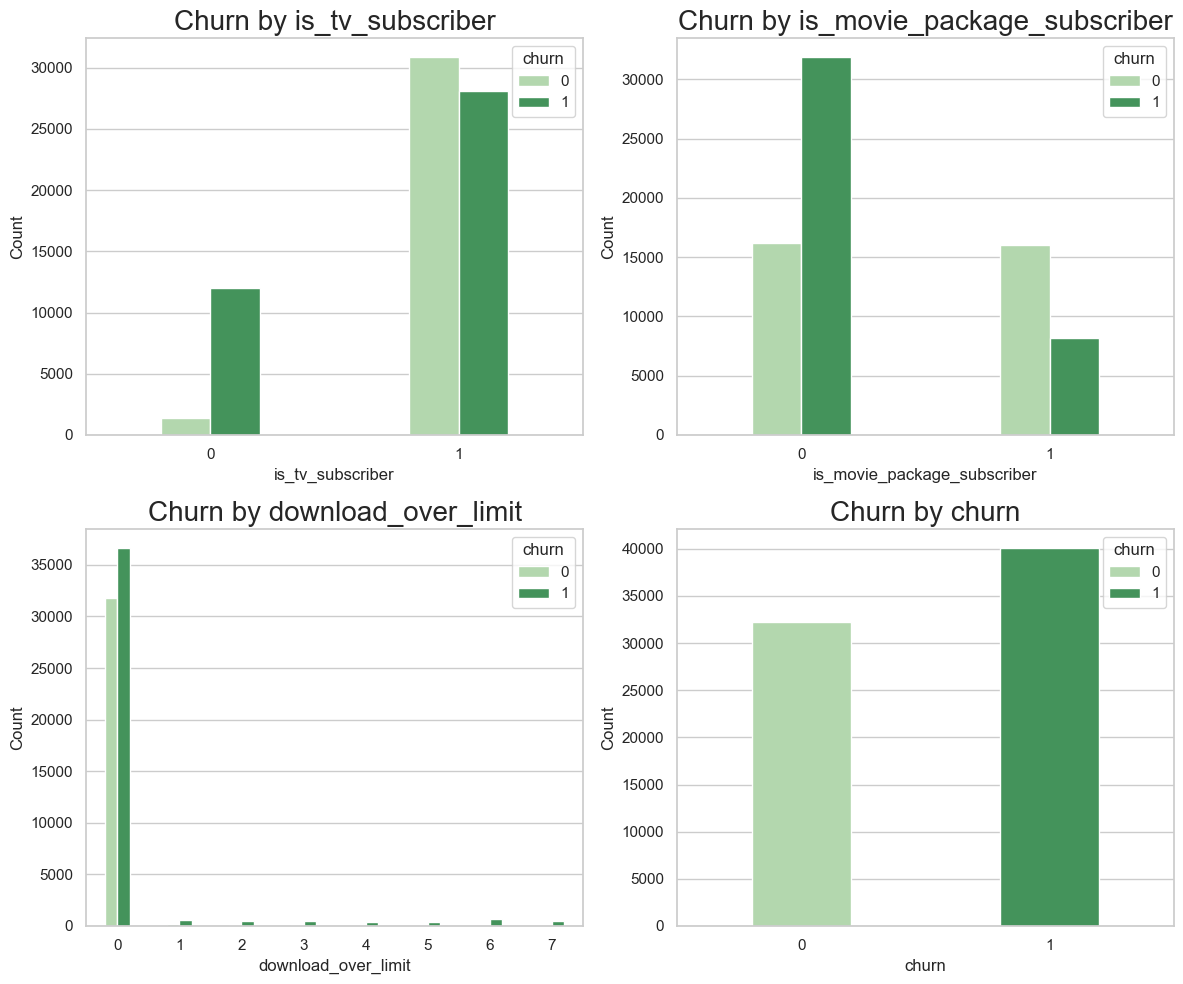

In [1429]:
plot_categorical_churn(df, categorical_columns)

- **Step 2.** Visualizing Churn vs Numerical Variables:

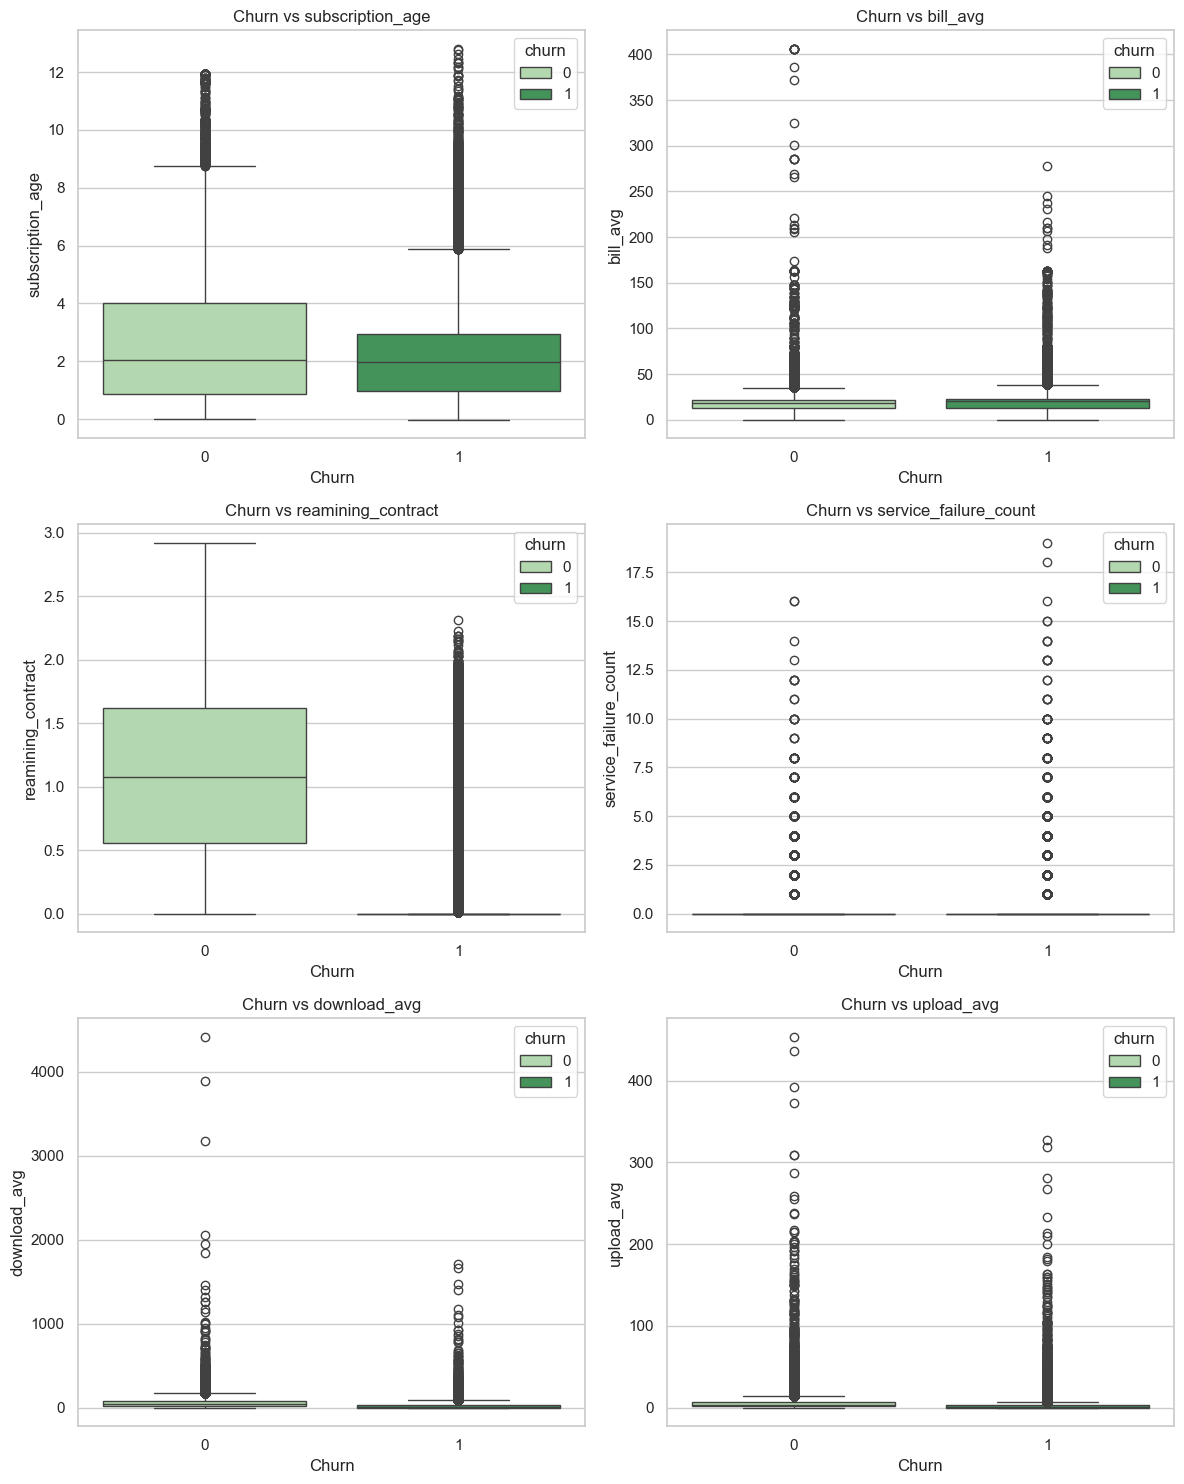

In [1430]:
plot_numerical_churn(df, numerical_columns)

# Results

The provided EDA results highlighted important trends and patterns in customer behavior that can guide feature engineering and predictive modeling efforts. The initial structure overview and the following Exploratory Data Analysis revealed the specialities of the given dataset, which will be definetely used for the Data Preprocessing and Modeling stages of the project.

Various EDA techniques were used in this research to explore the given data visually and statistically. Description of the most critical checkpoints of the analysis  conducted to achive the requirements of this project objectives:

##### **EDA Checkpoints:**

##### 1. **Missing values:**

The dataset contains missing values in several columns, including `bill_avg`, `remaining_contract`, `download_avg`, and `upload_avg`. 

The most crutial amount of missing values has `reamining_contract` column - blank values of **21572**, which is nearly 30% of the column (!) This result means that these customers never opted for contract.

**Recommendations how to handle missing values in data preprocessing:**

- For numerical columns (bill_avg, remaining_contract, download_avg, upload_avg, etc), imputing with mean or median shouls be considered. During the data preprocessing stage the columns with high numbers of blank values could also be deleted depending on the goals.

- For categorical columns (is_tv_subscriber, is_movie_package_subscriber, etc), the consistency should be ensured - missing values might be interpreted as 0.

##### 2. **Duplicates Detection:**

In result of the whole dataset review for the duplicates, it appeared that we are lucky to have zero duplicates in our dataset. Which means - we can skip the steps of addressing the duplicates issue in Data Preprocessing stage.

##### 3. **Data Distribution Analysis:**

Accordingly to the Data distribution tools and technics some patterns in customer behaviour were revealed:

- The analysis suggests a relation between subscription age and churn. Regardless of whether subscription age is high or low, generally most of customers leave the service earlier then in 3 years after subscription.

- Analysis also revealed a positive association between service failures and customer churn. Nevertheless, a notable exception exists: customers experiencing an exceptionally high number of service failures exhibit a lower leaning to churn. This suggests that while elevated service failures generally increase churn risk, the relationship may not be strictly linear.

- There is a significant class imbalance in target column, with 40,050 churned customers and only 32,224 non-churned customers. 

- Outliers were detected in the `subscription_age`, `bill_avg`, `download_avg`, `upload_avg`, `service_failure_count` columns.

**Recommendations for data preprocessing:**

- The class imbalance in target variable must be addressed during data preprocessing to prevent biased model training. Techniques such as *Oversampling* or *Undersampling* should be definetely considered.

##### 4. **Correlations:**

Correlation analysis was made in order to identify which features are strongly related to the target variable (`churn`) for using them for model prediction. It revealed:

- Strong Negative Correlation of `reamining_contract` with `churn`. This indicates that customers with longer remaining contracts and older subscriptions are less likely to churn.

- Moderate Positive Correlation between `download_avg` and `upload_avg`, indicating that customers with higher download speeds also tend to have higher upload speeds.

- Many variables show weak correlations with churn, suggesting that while some features might influence churn, the relationships are not very strong.


##### **Recommendations for Data Preprocessing and Modeling:**

- **Feature Selection**: Features like `reamining_contract` and `download_avg` show strong correlations with `churn` and should be considered important predictors in a churn prediction model (!)

- **Handling Multicollinearity**: `download_avg` and `upload_avg` are strongly correlated, so including both in the model might lead to multicollinearity. Using one of them or creating a combined feature should be considered (!)

- **Targeted Strategies**: Understanding the correlations will help in developing targeted retention business strategies. For example, focusing on customers with shorter remaining contracts and higher bills might be effective in reducing churn.

##### 5. **Categorical and numerical variables:**

The detailed Data exploring showed that there are different types of variables presented in our dataset:

- **Categorical variables**:

`is_tv_subscriber` - binary categorical variable (0 or 1).

`is_movie_package_subscriber` - also binary categorical variable (0 or 1).

`churn`- binary categorical variable (0 or 1).

`download_over_limit` - categorical, indicates a range of values likely to what extent customers have exceeded their download limits (8 unique values 0-7).

##### **Recommendations for Data Preprocessing and Modeling:**

- The catigorical nature of the variables in `download_over_limit` column should be taken into account while choosing the encoding algorythm. *Label Ecoding* might be the best option for it to encode.

- Other categorical variables could be encoded using appropriate algorythm on Data Preprocessing stage.

## Conclusion

Considering the specifics of the data a logistic regression model can be used to solve the problem. But keeping the business context in mind is necessary. For instance, retention surveys have shown that while price and product are important, most customers churn because of service failures and dissatisfaction with the customer care team.

# Data preprocessing

## 1. Processing missing values

In [1431]:
print(df.shape)
print(df.isna().sum())

(72274, 11)
id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


The columns remaining_contract, download_avg, and upload_avg in our dataset contain missing values. We will analyze each of these columns.

### 1.1 Analyze reamining_contract 

In [1432]:
#change all NaN to '0.00'
if "reamining_contract" in df.columns:
    df["reamining_contract"] = df["reamining_contract"].replace(np.nan, 0.00)

count_churn_1 = df[ df['churn'] == 1].shape[0]
count_zero_and_churn_1 = df[(df['reamining_contract'] == 0.00) & (df['churn'] == 1)].shape[0]
count_zero = df[(df['reamining_contract'] == 0.00)].shape[0]

print(f"Number of cases where 'churn' = 1: {count_churn_1}")
print(f"Number of cases where 'reamining_contract' == 0.00 (or NaN): {count_zero}")
print(f"Number of cases where 'reamining_contract' = 0.00 or NaN and 'churn' = 1: {count_zero_and_churn_1}")


percentage_churn_1 = count_zero_and_churn_1/count_churn_1 * 100
percentage_to_all = count_zero/df.shape[0] * 100
print(f"Percentage where churn == 1 and remaining_contract == 0.00 (or NaN): {percentage_churn_1:.2f}%")
print(f"Percentage where remaining_contract == 0.00 (or NaN) to all cases: {percentage_to_all:.2f}%")


Number of cases where 'churn' = 1: 40050
Number of cases where 'reamining_contract' == 0.00 (or NaN): 37935
Number of cases where 'reamining_contract' = 0.00 or NaN and 'churn' = 1: 36010
Percentage where churn == 1 and remaining_contract == 0.00 (or NaN): 89.91%
Percentage where remaining_contract == 0.00 (or NaN) to all cases: 52.49%


1. It can be concluded that in 90% of cases, if the "churn" column == 1, the "reamining_contract" will be either 0.00 (or NaN). It looks like the "reamining_contract" data is removing for some reason when a client breaks the contract. So we don't have data regarding the contract duration if the contract was already breaked for most of the cases.
2. The percentage of cases with lack of remaining_contract data (0.00 or NaN) to all cases is 52.5%.

Concludions: I believe that "reamining_contract" can be removed because of lack of a lot of data

### 1.2 Analyze download_avg and upload_avg

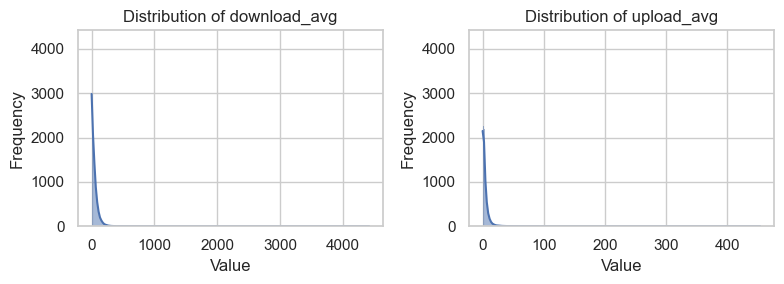

In [1433]:
сolumns_to_fill = ["download_avg", "upload_avg"]

max_value = max(df["download_avg"].max(), df["upload_avg"].max())


fig, axes = plt.subplots(1, 2, figsize=(8, 3))

for ax, column in zip(axes, сolumns_to_fill):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.set_ylim(0, max_value) 

plt.tight_layout() 
plt.show()

The plots indicate the presence of outliers in the columns. Therefore, it would be safer to replace NaN values with the median value.

In [1434]:
for column in сolumns_to_fill:
    df[column] = df[column].fillna(df[column].median())

print(df.isna().sum())

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


Removing incomplete data ("reamining_contract") and data that will not be used ("id")

In [1435]:
columns_to_drop = ["reamining_contract", "id"]
df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0,8.4,2.3,0,0
1,0,0,8.22,0,0,0.0,0.0,0,1
2,1,0,8.91,16,0,13.7,0.9,0,1
3,0,0,6.87,21,1,0.0,0.0,0,1
4,0,0,6.39,0,0,0.0,0.0,0,1


## 2. Encoding categorical variables: One-Hot Encoding або Label Encoding

In our scenario, the categorical variables (is_tv_subscriber, is_movie_package_subscriber) have binary values (0 or 1). Thus, using  One-Hot Encoding or Label Encoding for these variables is unnecessary.


## 3. Normalization of features: Standardization


Binary features (is_tv_subscriber and is_movie_package_subscriber) represent values 1 and 0, which are already normalized within a fixed range. Standardizing these features is unnecessary because it doesn't improve their scale and can distort their interpretation. 

### Data visualization continuous features

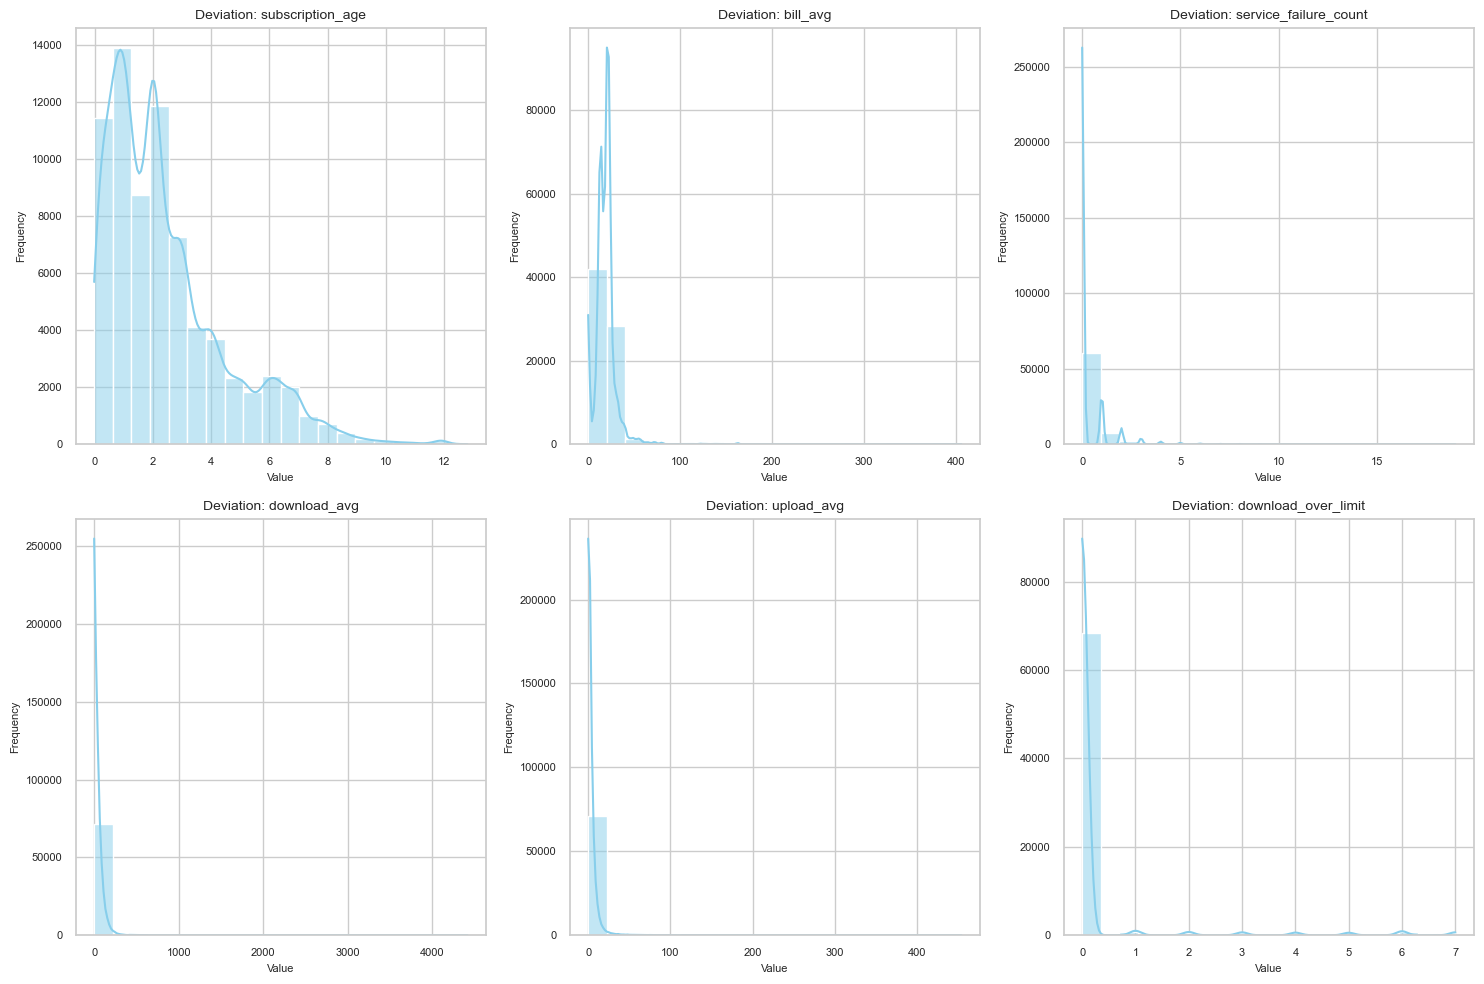

In [1436]:
columns_to_filter = ["subscription_age", "bill_avg", "service_failure_count", "download_avg", "upload_avg", "download_over_limit"]

sns.set(style="whitegrid")  

n_rows = (len(columns_to_filter) + 2) // 3

plt.figure(figsize=(15, 5 * n_rows))


for i, column_name in enumerate(columns_to_filter):
    plt.subplot(n_rows, 3, i + 1)  
    column_data = df[column_name].dropna()  
    sns.histplot(column_data, kde=True, color="skyblue", bins=20)  
    plt.title(f"Deviation: {column_name}", fontsize=10)
    plt.xlabel("Value", fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)


plt.tight_layout()

plt.show()

I will employ the Standard Deviation method for "bill_avg" due to their normal distribution as evidenced by the plots. The Interquartile Range (IQR) method will be utilized for the remaining features.

### Detection and removal of outliers in continuous numerical data

In [1437]:
columns_to_filter_normal_distribution = ["bill_avg"]
columns_to_filter = ["service_failure_count", "download_avg", "upload_avg", "download_over_limit", "subscription_age"]

for column in columns_to_filter:
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  
        
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


for column in columns_to_filter_normal_distribution:
    mean = df[column].mean()
    std = df[column].std()

    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

### Standardization

For "bill_avg" I will use "StandardScaler" due to their normal distribution and "MinMaxScaler" for remaining feutures

In [1438]:
columns_scaling = {
    "StandardScaler": ["bill_avg"],
    "MinMaxScaler": ["service_failure_count", "download_over_limit", "is_tv_subscriber", "is_movie_package_subscriber", "subscription_age"]
}

scalers = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler()
}

for scaler_name, columns in columns_scaling.items():
    scaler = scalers[scaler_name] 
    df[columns] = scaler.fit_transform(df[columns]) 

### Data visualization after the standartization

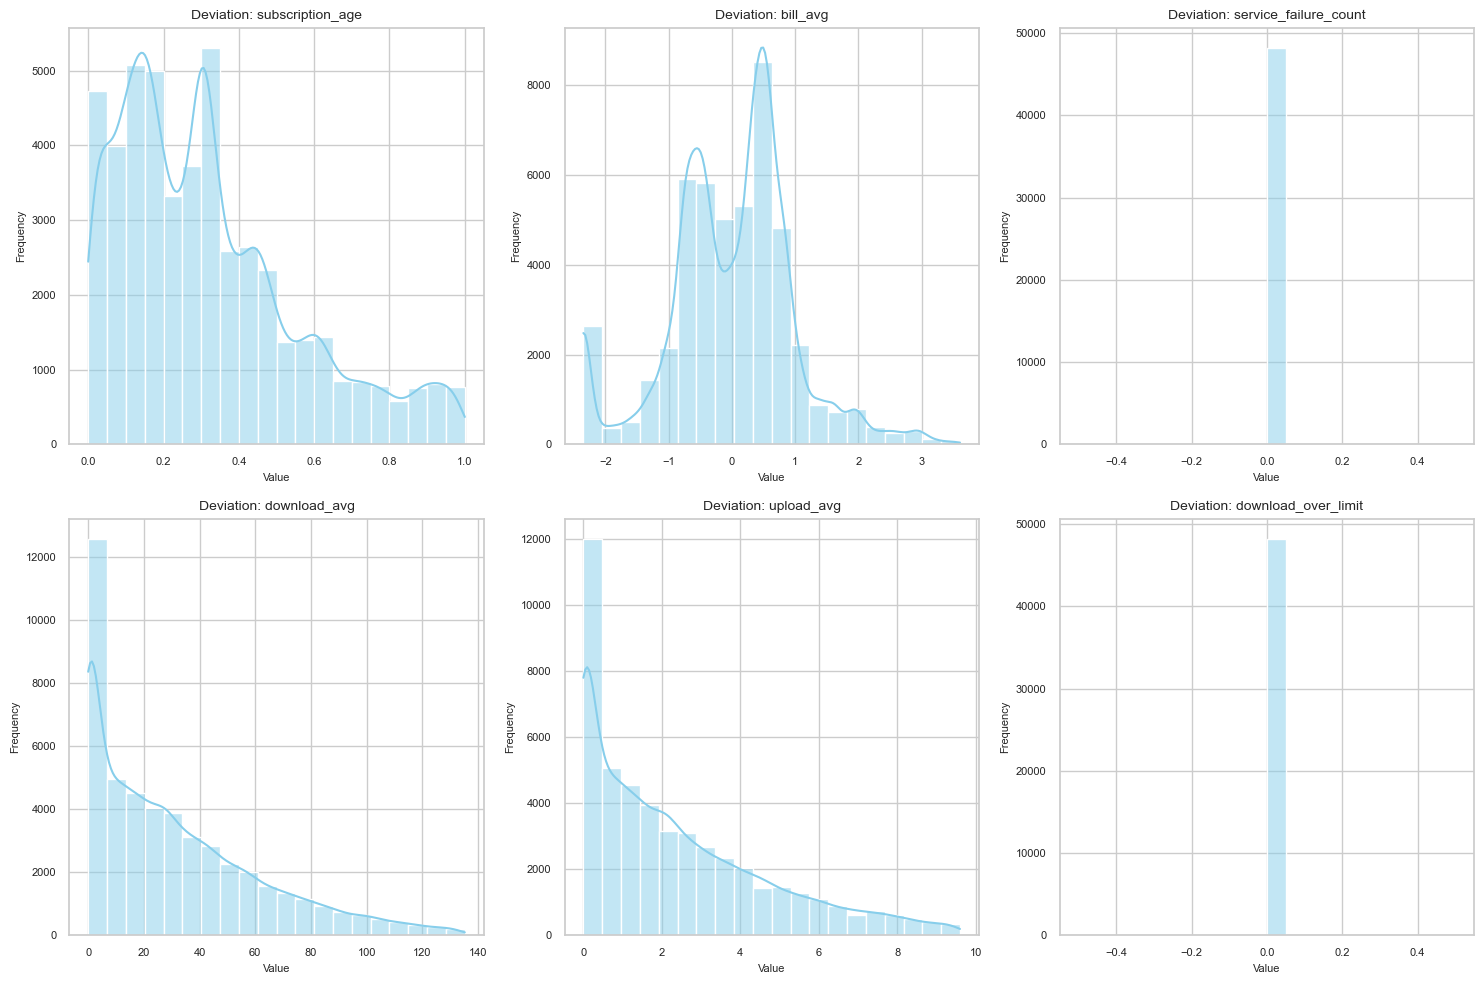

In [1439]:
columns_to_filter = ["subscription_age", "bill_avg", "service_failure_count", "download_avg", "upload_avg", "download_over_limit"]

sns.set(style="whitegrid")  

n_rows = (len(columns_to_filter) + 2) // 3

plt.figure(figsize=(15, 5 * n_rows))


for i, column_name in enumerate(columns_to_filter):
    plt.subplot(n_rows, 3, i + 1)  
    column_data = df[column_name].dropna()  
    sns.histplot(column_data, kde=True, color="skyblue", bins=20)  
    plt.title(f"Deviation: {column_name}", fontsize=10)
    plt.xlabel("Value", fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)


plt.tight_layout()

plt.show()

In [1440]:
#saving processed data

df.to_csv("preprocessed_dataset.csv", index=False)
